Specification
Value
Memory (GB)
16
Storage (GB)
512
CPU Class
1
Screen Size (inches)
14.0
Release Year
2025


Original Selling Price: 111,000 yen


Upgrade Item
Additional Cost (yen)
Add 16 GB memory
7,000
Add 512 GB storage
5,000
Upgrade CPU class by 1 level
15,000
Increase screen size from 14 to 16 inches
3,000



In [1]:
#!pip install pandas

In [2]:
import pandas as pd

df = pd.read_csv('synthetic_wtp_laptop_data.csv')

df.head()

,Memory,Storage,CPU_class,Screen_size,year,price
0,8,1024,3,16.0,2025,162021
1,32,1024,0,16.0,2024,112214
2,16,512,1,16.0,2025,118354
3,16,1024,1,16.0,2025,123383
4,16,256,3,16.0,2024,162968


In [3]:
# Exploratory Data Analysis
print("Dataset shape:", df.shape)
print("\nDataset info:")
print(df.info())
print("\nBasic statistics:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())


Dataset shape: (1000, 6)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Memory       1000 non-null   int64  
 1   Storage      1000 non-null   int64  
 2   CPU_class    1000 non-null   int64  
 3   Screen_size  1000 non-null   float64
 4   year         1000 non-null   int64  
 5   price        1000 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 47.0 KB
None

Basic statistics:
            Memory      Storage    CPU_class  Screen_size         year  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     18.704000   594.688000     1.502000    15.203200  2024.524000   
std      10.009024   319.767594     1.123948     0.864278     0.499674   
min       8.000000   256.000000     0.000000    14.000000  2024.000000   
25%       8.000000   256.000000     1.000000    14.000000  2024.000000   


In [4]:
# Install required packages for modeling
%pip install scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [5]:
# Import required libraries for modeling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")


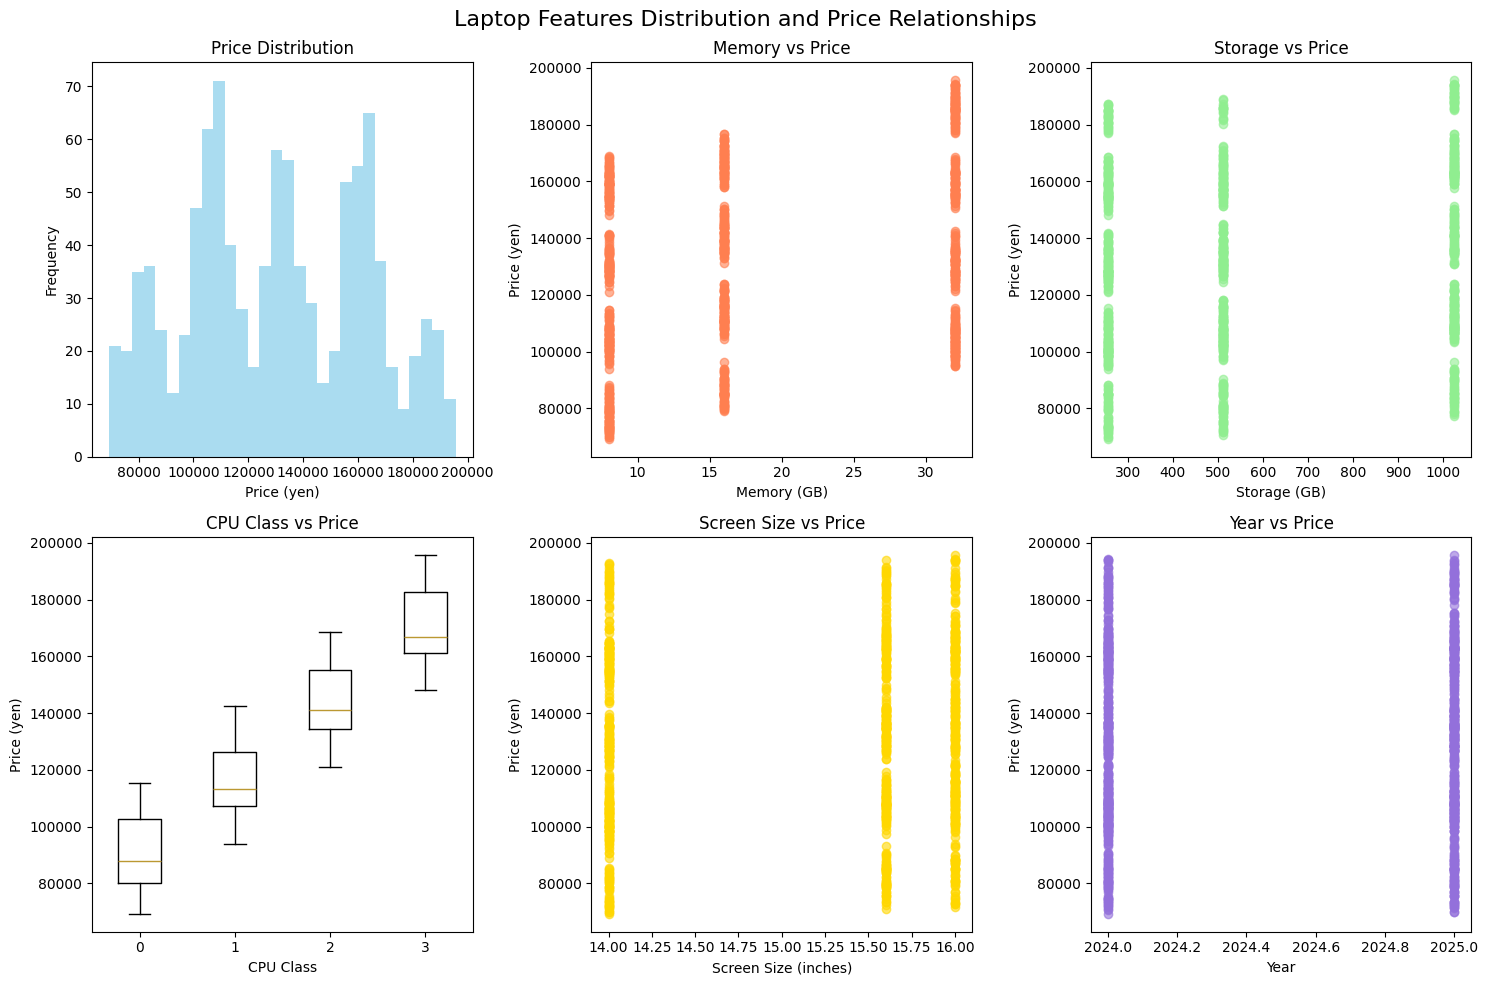

In [6]:
# Visualize the data
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Laptop Features Distribution and Price Relationships', fontsize=16)

# Price distribution
axes[0, 0].hist(df['price'], bins=30, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Price Distribution')
axes[0, 0].set_xlabel('Price (yen)')
axes[0, 0].set_ylabel('Frequency')

# Memory vs Price
axes[0, 1].scatter(df['Memory'], df['price'], alpha=0.6, color='coral')
axes[0, 1].set_title('Memory vs Price')
axes[0, 1].set_xlabel('Memory (GB)')
axes[0, 1].set_ylabel('Price (yen)')

# Storage vs Price
axes[0, 2].scatter(df['Storage'], df['price'], alpha=0.6, color='lightgreen')
axes[0, 2].set_title('Storage vs Price')
axes[0, 2].set_xlabel('Storage (GB)')
axes[0, 2].set_ylabel('Price (yen)')

# CPU class vs Price
axes[1, 0].boxplot([df[df['CPU_class'] == i]['price'].values for i in sorted(df['CPU_class'].unique())])
axes[1, 0].set_title('CPU Class vs Price')
axes[1, 0].set_xlabel('CPU Class')
axes[1, 0].set_ylabel('Price (yen)')
axes[1, 0].set_xticklabels(sorted(df['CPU_class'].unique()))

# Screen size vs Price
axes[1, 1].scatter(df['Screen_size'], df['price'], alpha=0.6, color='gold')
axes[1, 1].set_title('Screen Size vs Price')
axes[1, 1].set_xlabel('Screen Size (inches)')
axes[1, 1].set_ylabel('Price (yen)')

# Year vs Price
axes[1, 2].scatter(df['year'], df['price'], alpha=0.6, color='mediumpurple')
axes[1, 2].set_title('Year vs Price')
axes[1, 2].set_xlabel('Year')
axes[1, 2].set_ylabel('Price (yen)')

plt.tight_layout()
plt.show()


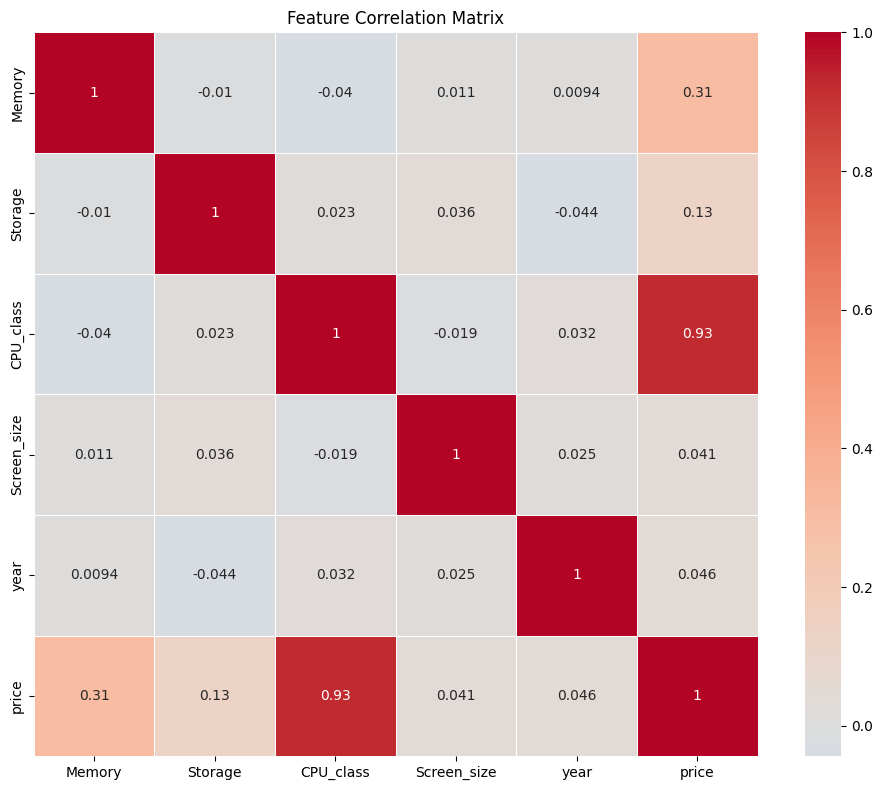

Correlation with price:
CPU_class: 0.926
Memory: 0.310
Storage: 0.132
year: 0.046
Screen_size: 0.041


In [7]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Print correlation with price
print("Correlation with price:")
price_correlations = df.corr()['price'].sort_values(ascending=False)
for feature, corr in price_correlations.items():
    if feature != 'price':
        print(f"{feature}: {corr:.3f}")


In [8]:
# Prepare data for modeling
# Define features (X) and target (y)
features = ['Memory', 'Storage', 'CPU_class', 'Screen_size', 'year']
X = df[features]
y = df['price']

print("Features for the model:")
print(X.columns.tolist())
print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Features for the model:
['Memory', 'Storage', 'CPU_class', 'Screen_size', 'year']

Feature matrix shape: (1000, 5)
Target vector shape: (1000,)

Training set size: 800
Test set size: 200


In [9]:
# Train Linear Regression model
print("=== LINEAR REGRESSION MODEL ===")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Calculate metrics
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error: {lr_mse:,.2f}")
print(f"Root Mean Squared Error: {lr_rmse:,.2f}")
print(f"Mean Absolute Error: {lr_mae:,.2f}")
print(f"R² Score: {lr_r2:.4f}")

# Feature importance (coefficients)
print("\nFeature Coefficients:")
for feature, coef in zip(features, lr_model.coef_):
    print(f"{feature}: {coef:,.2f}")


=== LINEAR REGRESSION MODEL ===
Mean Squared Error: 5,460,521.29
Root Mean Squared Error: 2,336.78
Mean Absolute Error: 2,017.83
R² Score: 0.9950

Feature Coefficients:
Memory: 1,127.88
Storage: 11.55
CPU_class: 26,941.27
Screen_size: 1,957.79
year: 1,072.45


In [10]:
# Train Random Forest model for comparison
print("\n=== RANDOM FOREST MODEL ===")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error: {rf_mse:,.2f}")
print(f"Root Mean Squared Error: {rf_rmse:,.2f}")
print(f"Mean Absolute Error: {rf_mae:,.2f}")
print(f"R² Score: {rf_r2:.4f}")

# Feature importance
print("\nFeature Importance:")
for feature, importance in zip(features, rf_model.feature_importances_):
    print(f"{feature}: {importance:.4f}")



=== RANDOM FOREST MODEL ===
Mean Squared Error: 6,081,777.59
Root Mean Squared Error: 2,466.13
Mean Absolute Error: 2,059.13
R² Score: 0.9944

Feature Importance:
Memory: 0.1247
Storage: 0.0139
CPU_class: 0.8570
Screen_size: 0.0034
year: 0.0009


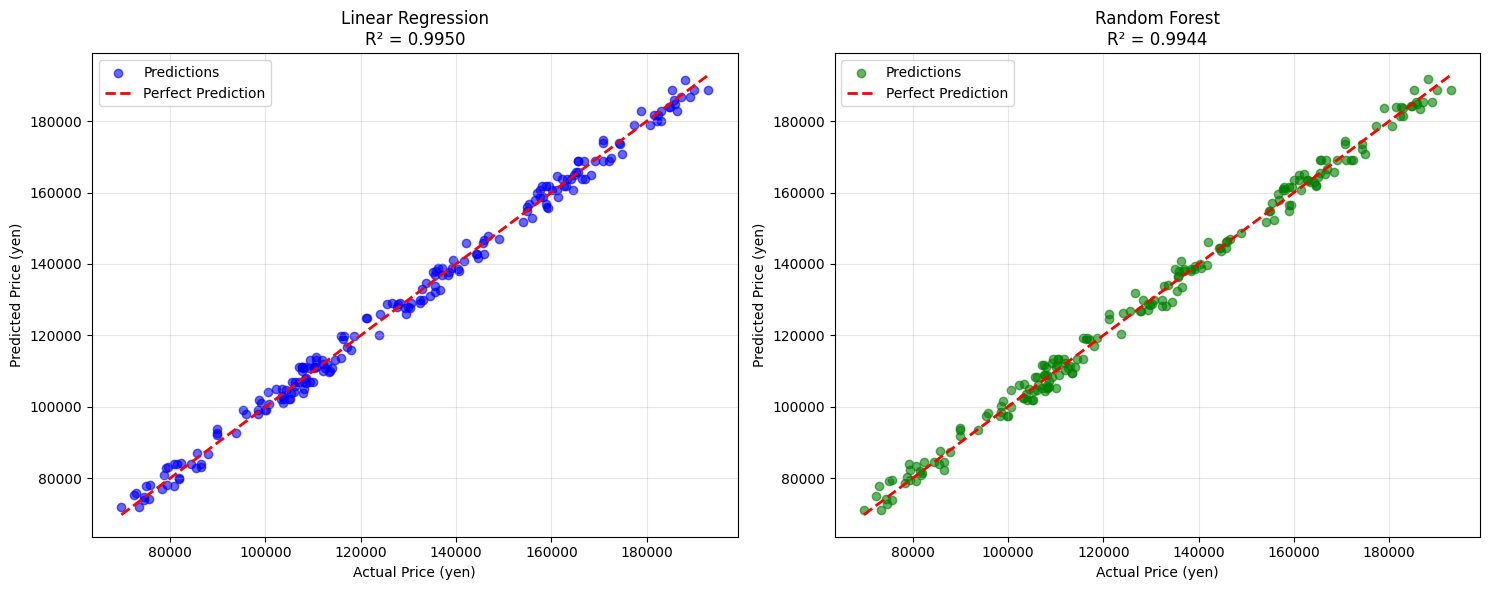


=== MODEL COMPARISON ===
            Model        RMSE         MAE  R² Score
Linear Regression 2336.775832 2017.834851  0.994960
    Random Forest 2466.126028 2059.134309  0.994386


In [11]:
# Model comparison and visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Linear Regression predictions vs actual
axes[0].scatter(y_test, y_pred_lr, alpha=0.6, color='blue', label='Predictions')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price (yen)')
axes[0].set_ylabel('Predicted Price (yen)')
axes[0].set_title(f'Linear Regression\nR² = {lr_r2:.4f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Random Forest predictions vs actual
axes[1].scatter(y_test, y_pred_rf, alpha=0.6, color='green', label='Predictions')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Price (yen)')
axes[1].set_ylabel('Predicted Price (yen)')
axes[1].set_title(f'Random Forest\nR² = {rf_r2:.4f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Model comparison summary
print("\n=== MODEL COMPARISON ===")
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [lr_rmse, rf_rmse],
    'MAE': [lr_mae, rf_mae],
    'R² Score': [lr_r2, rf_r2]
})
print(comparison_df.to_string(index=False))


In [12]:
# Function to predict price for new laptop configurations
def predict_laptop_price(memory, storage, cpu_class, screen_size, year, model='random_forest'):
    """
    Predict laptop price based on specifications
    
    Parameters:
    - memory: Memory in GB
    - storage: Storage in GB  
    - cpu_class: CPU class (integer)
    - screen_size: Screen size in inches
    - year: Release year
    - model: 'linear_regression' or 'random_forest'
    """
    # Create input array
    input_data = np.array([[memory, storage, cpu_class, screen_size, year]])
    
    # Make prediction
    if model == 'linear_regression':
        predicted_price = lr_model.predict(input_data)[0]
        model_name = "Linear Regression"
    else:
        predicted_price = rf_model.predict(input_data)[0]
        model_name = "Random Forest"
    
    print(f"=== PRICE PREDICTION ({model_name}) ===")
    print(f"Laptop Specifications:")
    print(f"  Memory: {memory} GB")
    print(f"  Storage: {storage} GB")
    print(f"  CPU Class: {cpu_class}")
    print(f"  Screen Size: {screen_size} inches")
    print(f"  Year: {year}")
    print(f"\nPredicted Price: ¥{predicted_price:,.0f}")
    
    return predicted_price

# Example predictions
print("=== EXAMPLE PREDICTIONS ===")

# Example 1: Basic configuration
predict_laptop_price(8, 256, 1, 14.0, 2024, 'random_forest')

print("\n" + "="*50)

# Example 2: High-end configuration  
predict_laptop_price(32, 1024, 3, 16.0, 2025, 'random_forest')

print("\n" + "="*50)

# Example 3: Budget configuration
predict_laptop_price(8, 128, 0, 13.3, 2023, 'random_forest')


=== EXAMPLE PREDICTIONS ===
=== PRICE PREDICTION (Random Forest) ===
Laptop Specifications:
  Memory: 8 GB
  Storage: 256 GB
  CPU Class: 1
  Screen Size: 14.0 inches
  Year: 2024

Predicted Price: ¥98,168

=== PRICE PREDICTION (Random Forest) ===
Laptop Specifications:
  Memory: 32 GB
  Storage: 1024 GB
  CPU Class: 3
  Screen Size: 16.0 inches
  Year: 2025

Predicted Price: ¥194,183

=== PRICE PREDICTION (Random Forest) ===
Laptop Specifications:
  Memory: 8 GB
  Storage: 128 GB
  CPU Class: 0
  Screen Size: 13.3 inches
  Year: 2023

Predicted Price: ¥72,228


c:\Users\santi\Desktop\Japan\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\santi\Desktop\Japan\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\santi\Desktop\Japan\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(72227.88002380953)

In [13]:
# Calculate how much the laptop specifications from the beginning would cost
print("=== ORIGINAL LAPTOP PRICE PREDICTION ===")
print("Based on the laptop specifications mentioned at the beginning:")
print("- Memory: 16 GB")
print("- Storage: 512 GB") 
print("- CPU Class: 1")
print("- Screen Size: 14.0 inches")
print("- Release Year: 2025")
print("- Original Selling Price: ¥111,000")

predicted_price_original = predict_laptop_price(16, 512, 1, 14.0, 2025, 'random_forest')

print(f"\nDifference from original price: ¥{predicted_price_original - 111000:,.0f}")
if predicted_price_original > 111000:
    print(f"Model predicts {((predicted_price_original/111000 - 1) * 100):.1f}% higher than original price")
else:
    print(f"Model predicts {((1 - predicted_price_original/111000) * 100):.1f}% lower than original price")


=== ORIGINAL LAPTOP PRICE PREDICTION ===
Based on the laptop specifications mentioned at the beginning:
- Memory: 16 GB
- Storage: 512 GB
- CPU Class: 1
- Screen Size: 14.0 inches
- Release Year: 2025
- Original Selling Price: ¥111,000
=== PRICE PREDICTION (Random Forest) ===
Laptop Specifications:
  Memory: 16 GB
  Storage: 512 GB
  CPU Class: 1
  Screen Size: 14.0 inches
  Year: 2025

Predicted Price: ¥111,190

Difference from original price: ¥190
Model predicts 0.2% higher than original price


c:\Users\santi\Desktop\Japan\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [14]:
# UPGRADE ANALYSIS
print("="*60)
print("LAPTOP UPGRADE VALUE ANALYSIS")
print("="*60)

# Current laptop specifications
current_specs = {
    'memory': 16,
    'storage': 512, 
    'cpu_class': 1,
    'screen_size': 14.0,
    'year': 2025
}

# Current price
current_price = 111000

# Upgrade costs
upgrade_costs = {
    'memory': 7000,      # Add 16 GB memory
    'storage': 5000,     # Add 512 GB storage  
    'cpu_class': 15000,  # Upgrade CPU class by 1 level
    'screen_size': 3000  # Increase screen size from 14 to 16 inches
}

print(f"Current Laptop Specifications:")
for spec, value in current_specs.items():
    unit = "GB" if spec in ['memory', 'storage'] else ("inches" if spec == 'screen_size' else "")
    print(f"  {spec.replace('_', ' ').title()}: {value} {unit}")
print(f"Current Price: ¥{current_price:,}")

# Get current predicted price
current_predicted = rf_model.predict([[
    current_specs['memory'],
    current_specs['storage'], 
    current_specs['cpu_class'],
    current_specs['screen_size'],
    current_specs['year']
]])[0]

print(f"Model Predicted Price: ¥{current_predicted:,.0f}")
print(f"Difference from actual: ¥{current_predicted - current_price:,.0f}")
print()


LAPTOP UPGRADE VALUE ANALYSIS
Current Laptop Specifications:
  Memory: 16 GB
  Storage: 512 GB
  Cpu Class: 1 
  Screen Size: 14.0 inches
  Year: 2025 
Current Price: ¥111,000
Model Predicted Price: ¥111,190
Difference from actual: ¥190



c:\Users\santi\Desktop\Japan\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [15]:
# Analyze each upgrade individually
print("INDIVIDUAL UPGRADE ANALYSIS:")
print("-" * 60)

upgrade_analysis = []

for upgrade_type, cost in upgrade_costs.items():
    # Create upgraded specs
    upgraded_specs = current_specs.copy()
    
    if upgrade_type == 'memory':
        upgraded_specs['memory'] = 32  # 16 + 16 GB
        upgrade_description = "Add 16 GB Memory (16→32 GB)"
    elif upgrade_type == 'storage':
        upgraded_specs['storage'] = 1024  # 512 + 512 GB
        upgrade_description = "Add 512 GB Storage (512→1024 GB)"
    elif upgrade_type == 'cpu_class':
        upgraded_specs['cpu_class'] = 2  # 1 + 1 level
        upgrade_description = "Upgrade CPU Class (1→2)"
    elif upgrade_type == 'screen_size':
        upgraded_specs['screen_size'] = 16.0  # 14→16 inches
        upgrade_description = "Upgrade Screen Size (14\"→16\")"
    
    # Predict new price
    upgraded_predicted = rf_model.predict([[
        upgraded_specs['memory'],
        upgraded_specs['storage'],
        upgraded_specs['cpu_class'], 
        upgraded_specs['screen_size'],
        upgraded_specs['year']
    ]])[0]
    
    # Calculate value metrics
    predicted_value_increase = upgraded_predicted - current_predicted
    value_vs_cost_ratio = predicted_value_increase / cost
    net_value = predicted_value_increase - cost
    
    print(f"\n{upgrade_description}:")
    print(f"  Upgrade Cost: ¥{cost:,}")
    print(f"  Predicted Value Increase: ¥{predicted_value_increase:,.0f}")
    print(f"  Net Value (Gain - Cost): ¥{net_value:,.0f}")
    print(f"  Value/Cost Ratio: {value_vs_cost_ratio:.2f}")
    
    if net_value > 0:
        print(f"  ✅ GOOD VALUE - You gain ¥{net_value:,.0f} in value")
    else:
        print(f"  ❌ POOR VALUE - You lose ¥{abs(net_value):,.0f} in value")
    
    # Store for comparison
    upgrade_analysis.append({
        'upgrade': upgrade_description,
        'cost': cost,
        'value_increase': predicted_value_increase,
        'net_value': net_value,
        'ratio': value_vs_cost_ratio
    })


INDIVIDUAL UPGRADE ANALYSIS:
------------------------------------------------------------

Add 16 GB Memory (16→32 GB):
  Upgrade Cost: ¥7,000
  Predicted Value Increase: ¥20,627
  Net Value (Gain - Cost): ¥13,627
  Value/Cost Ratio: 2.95
  ✅ GOOD VALUE - You gain ¥13,627 in value

Add 512 GB Storage (512→1024 GB):
  Upgrade Cost: ¥5,000
  Predicted Value Increase: ¥7,656
  Net Value (Gain - Cost): ¥2,656
  Value/Cost Ratio: 1.53
  ✅ GOOD VALUE - You gain ¥2,656 in value

Upgrade CPU Class (1→2):
  Upgrade Cost: ¥15,000
  Predicted Value Increase: ¥25,533
  Net Value (Gain - Cost): ¥10,533
  Value/Cost Ratio: 1.70
  ✅ GOOD VALUE - You gain ¥10,533 in value

Upgrade Screen Size (14"→16"):
  Upgrade Cost: ¥3,000
  Predicted Value Increase: ¥3,722
  Net Value (Gain - Cost): ¥722
  Value/Cost Ratio: 1.24
  ✅ GOOD VALUE - You gain ¥722 in value


c:\Users\santi\Desktop\Japan\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\santi\Desktop\Japan\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\santi\Desktop\Japan\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\santi\Desktop\Japan\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
